In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
dat = pd.read_csv('data/node_info_full.csv', index_col=0)

In [3]:
dat.describe()

,count,edge_count,edge_per_node,comp_links,gene_links,prot_links,dis_links,basenode_links,basenode_fract,basenode_prop
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,294.249545,2763.602004,131.846174,181.010929,579.963570,481.282332,33.130237,1275.387067,inf,145.819972
std,4984.119300,28841.265343,2082.168927,4749.553283,9208.611736,10296.049512,472.494517,14832.283557,NaN,2176.726554
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,1.000000
50%,1.000000,5.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.547727,2.000000
75%,1.000000,19.000000,10.000000,3.000000,0.000000,0.000000,2.000000,6.000000,0.944048,4.000000
max,156692.000000,528464.000000,55706.000000,156872.000000,280347.000000,331603.000000,10440.000000,331681.000000,inf,60163.000000


### Why are some values infinity?

In [4]:
dat.query('basenode_fract == {}'.format(float("inf")))

,count,edge_count,edge_per_node,comp_links,gene_links,prot_links,dis_links,basenode_links,basenode_fract,basenode_prop
Australian pregnancy category,7,0,0.0,20,0,0,0,20,inf,2.857143
diagnostic procedure,5,0,0.0,0,0,0,6,6,inf,1.200000
acid-sensing ion channel,5,0,0.0,0,0,5,0,5,inf,1.000000
US pregnancy category,5,0,0.0,37,0,0,0,37,inf,7.400000
epithelial sodium channel,4,0,0.0,0,0,5,0,5,inf,1.250000
theory,3,0,0.0,2,0,0,1,3,inf,1.000000
GHS signal word,2,0,0.0,21,0,0,0,21,inf,10.500000
geographic region,2,0,0.0,3,0,0,0,3,inf,1.500000
molecule,2,0,0.0,2,0,0,0,2,inf,1.000000
encyclopedia,2,0,0.0,24,0,0,15,39,inf,19.500000


### Remove infinite values, and rename some columns to better names

In [5]:
dat1 = dat.replace(float('inf'), float('NaN')).dropna()
dat1 = dat1.rename(columns={'edge_per_node':'avg_degree', 'basenode_prop': 'avg_basenode_degree', 'basenode_links':'conn_to_basenodes'})

In [6]:
dat1.head(20)

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree
Compound,156692,203118,1.296288,4368,43,7258,5750,17419,0.085758,0.111167
Protein,26706,528464,19.788212,7258,54172,16,17,61463,0.116305,2.301468
Protein-coding Gene,20703,503434,24.316959,4,0,49191,4343,53538,0.106346,2.586002
Non-coding RNA,18064,68349,3.783713,0,0,3733,41,3774,0.055217,0.208924
GO Term,17281,399548,23.120653,56,0,331603,22,331681,0.830141,19.193392
Mus musculus; gene; protein-coding gene,17096,139489,8.159160,0,34372,46,0,34418,0.246743,2.013219
Pseudogene,16861,53542,3.175494,0,0,896,16,912,0.017033,0.054089
brown rat; gene; protein-coding gene,16564,134971,8.148454,0,33341,3,0,33344,0.247046,2.013040
Disease,8785,46817,5.329197,5750,4402,17,10440,20609,0.440203,2.345931
protein family,7187,32936,4.582719,1,0,14296,0,14297,0.434084,1.989286


### Label node types as to wheather we want to include them

- Basenode should be labeled
- A few nodes I know I want to include should be labeled
- Find conditions for other nodes to be labeled

In [7]:
dat1['include'] = 'no'

In [8]:
# These are the base-nodes (Gene split into 4 types now)
base = ['Compound', 'Protein', 'Protein-coding Gene', 'Non-coding RNA', 'Pseudogene', 'Disease', 'Gene']
dat1.loc[base, 'include'] = 'basenodes'

In [9]:
# Want to include these types
include = ['GO Term', 'protein family', 'protein domain', 'mature microRNA']
dat1.loc[include, 'include'] = 'yes'

In [10]:
dat1.loc[include]

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree,include
GO Term,17281,399548,23.120653,56,0,331603,22,331681,0.830141,19.193392,yes
protein family,7187,32936,4.582719,1,0,14296,0,14297,0.434084,1.989286,yes
protein domain,4245,61553,14.500118,5,0,49930,0,49935,0.811252,11.763251,yes
mature microRNA,2285,292309,127.925164,0,280347,4934,0,285281,0.975957,124.849453,yes


In [11]:
idx = dat1.query('count > 5 '
                 'and avg_degree > 4 '
                 'and basenode_fract > .5 '
                 'and include == "no"'
                ).index
dat1.loc[idx, 'include'] = 'maybe'

In [12]:
dat1.loc[idx].describe()

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,99.000000,16890.285714,556.055928,7972.809524,4890.761905,1786.523810,135.190476,14785.285714,0.784441,461.797157
std,224.857288,42126.930878,1542.179367,34150.128743,14248.527952,5815.280403,465.297176,38040.482454,0.148052,1226.893576
min,7.000000,37.000000,5.285714,0.000000,0.000000,0.000000,0.000000,23.000000,0.531250,3.285714
25%,11.000000,194.000000,12.916667,0.000000,0.000000,0.000000,0.000000,136.000000,0.658033,9.438445
50%,23.000000,551.000000,20.545455,53.000000,0.000000,3.000000,0.000000,509.000000,0.778761,16.245614
75%,57.000000,6641.000000,44.857143,304.000000,1.000000,926.000000,3.000000,4370.000000,0.923775,40.640000
max,981.000000,157089.000000,6212.600000,156872.000000,60160.000000,26706.000000,2031.000000,156875.000000,0.998638,4403.850000


In [13]:
dat1.loc[idx]

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree,include
Other,981,19026,19.394495,708,16867,11,767,18353,0.964627,18.708461,maybe
Supersecondary structure,463,6641,14.343413,0,0,4370,0,4370,0.658033,9.438445,maybe
Structural motif,115,2857,24.843478,0,0,2466,0,2466,0.863143,21.443478,maybe
active site,92,1615,17.554348,0,0,1142,0,1142,0.707121,12.413043,maybe
chemical compound,85,474,5.576471,292,0,0,1,293,0.618143,3.447059,maybe
Binding site,57,1285,22.543860,0,0,926,0,926,0.720623,16.245614,maybe
medical specialty,50,2397,47.940000,1,0,0,2031,2032,0.847726,40.640000,maybe
chemical substance,42,157089,3740.214286,156872,0,0,3,156875,0.998638,3735.119048,maybe
chemical element,37,7246,195.837838,6942,6,13,2,6963,0.960944,188.189189,maybe
Chromosome,25,29856,1194.240000,0,25671,1671,0,27342,0.915796,1093.680000,maybe


Use:
- Supersecondary Structure
- Structoral Motif

Maybe Use: 
- Active Site
- Binding Site
- Post Translational Modification

Use if it had more links:
- family of compound

In [14]:
plot_list = ['count', 'edge_count', 'avg_degree', 'conn_to_basenodes', 'basenode_fract', 'avg_basenode_degree']

/home/mmayers/projects/wikidata/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


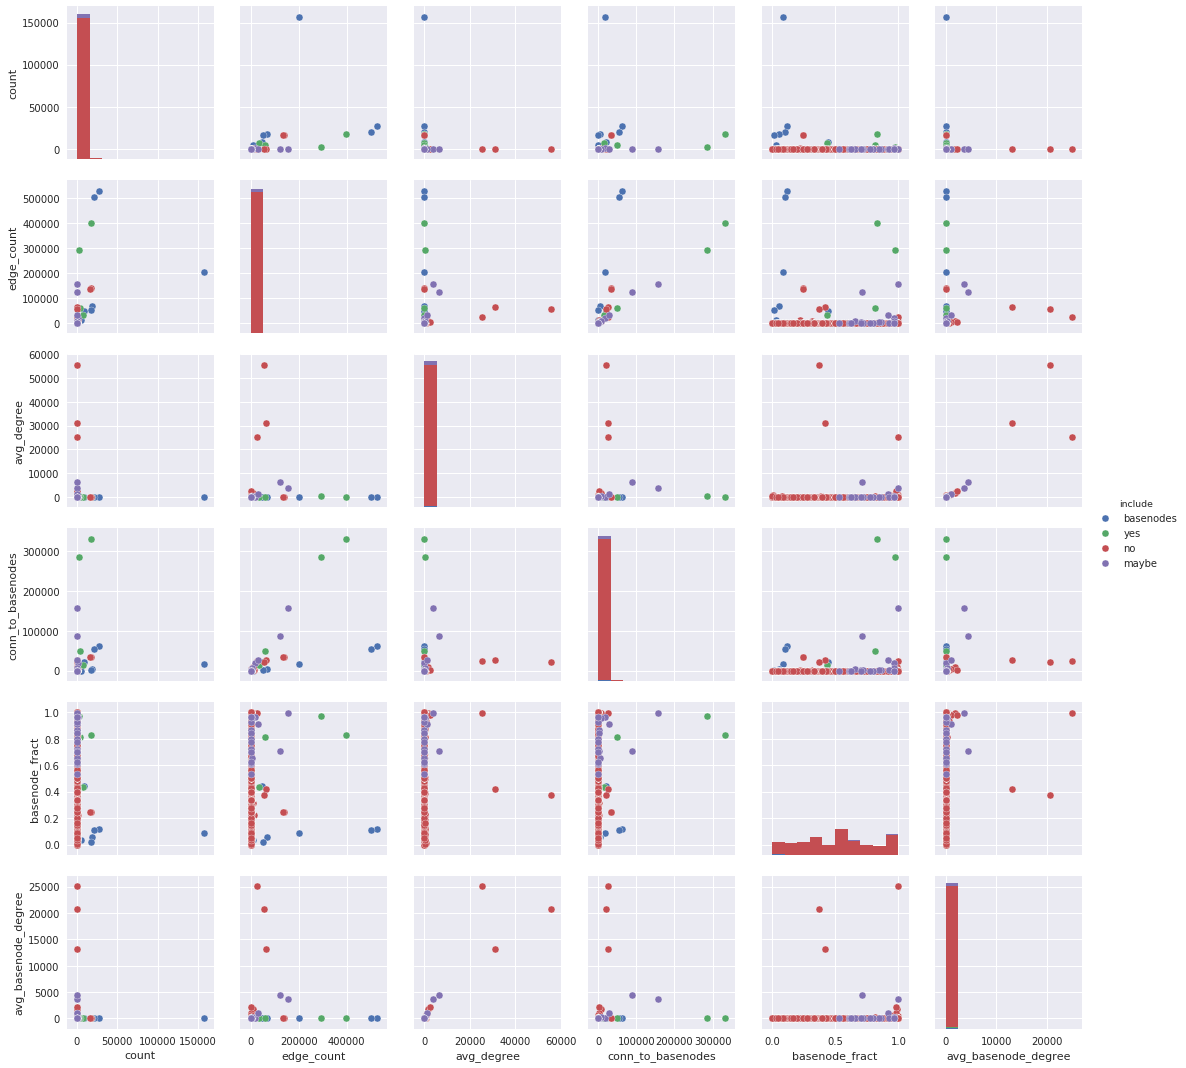

In [15]:
sns.pairplot(dat1[plot_list + ['include']], hue = 'include')

## Top Node Count excluded

In [16]:
dat1.query('include == "no" and count > 5').sort_values('count', ascending=False).head(10)

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree,include
Mus musculus; gene; protein-coding gene,17096,139489,8.159160,0,34372,46,0,34418,0.246743,2.013219,no
brown rat; gene; protein-coding gene,16564,134971,8.148454,0,33341,3,0,33344,0.247046,2.013040,no
Saccharomyces cerevisiae S288c; gene; protein-coding gene,1332,11954,8.974474,0,2660,0,0,2660,0.222520,1.996997,no
chemical hazard,596,8069,13.538591,1244,2,0,1298,2544,0.315281,4.268456,no
human,244,1094,4.483607,83,0,1,227,311,0.284278,1.274590,no
taxon,129,340,2.635659,23,0,0,258,281,0.826471,2.178295,no
anatomical structure,54,790,14.629630,0,0,0,81,81,0.102532,1.500000,no
symptom,40,1545,38.625000,173,0,0,104,277,0.179288,6.925000,no
Mus musculus; gene; pseudogene,32,160,5.000000,0,64,0,0,64,0.400000,2.000000,no
Wikimedia permanent duplicated page,20,38,1.900000,3,0,0,35,38,1.000000,1.900000,no


- Chemical Hazard

## Top avg degree excluded

In [17]:
dat1.query('include == "no" and count > 5').sort_values('avg_degree', ascending=False).head(10)

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree,include
route of administration,18,697,38.722222,162,0,0,1,163,0.233859,9.055556,no
symptom,40,1545,38.625000,173,0,0,104,277,0.179288,6.925000,no
animal organ,8,270,33.750000,0,0,1,20,21,0.077778,2.625000,no
edition,7,209,29.857143,7,0,0,11,18,0.086124,2.571429,no
encyclopedic dictionary,7,182,26.000000,45,0,0,17,62,0.340659,8.857143,no
period,6,118,19.666667,52,0,0,0,52,0.440678,8.666667,no
anatomical structure,54,790,14.629630,0,0,0,81,81,0.102532,1.500000,no
chemical hazard,596,8069,13.538591,1244,2,0,1298,2544,0.315281,4.268456,no
protein,7,90,12.857143,2,6,1,2,11,0.122222,1.571429,no
disease,20,207,10.350000,2,0,0,66,68,0.328502,3.400000,no


## Average Basenode Degree excluded

In [18]:
dat1.query('include == "no" and count > 5').sort_values('avg_basenode_degree', ascending=False).head(10)

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree,include
route of administration,18,697,38.722222,162,0,0,1,163,0.233859,9.055556,no
encyclopedic dictionary,7,182,26.000000,45,0,0,17,62,0.340659,8.857143,no
period,6,118,19.666667,52,0,0,0,52,0.440678,8.666667,no
symptom,40,1545,38.625000,173,0,0,104,277,0.179288,6.925000,no
chemical hazard,596,8069,13.538591,1244,2,0,1298,2544,0.315281,4.268456,no
disease,20,207,10.350000,2,0,0,66,68,0.328502,3.400000,no
medical sign,18,164,9.111111,15,0,0,43,58,0.353659,3.222222,no
animal organ,8,270,33.750000,0,0,1,20,21,0.077778,2.625000,no
edition,7,209,29.857143,7,0,0,11,18,0.086124,2.571429,no
group of chemical substances,6,20,3.333333,14,0,0,1,15,0.750000,2.500000,no


- Symptom

## Top Basenode Fraction excluded (with at least 5 nodes)

In [19]:
dat1.query('include == "no" and count > 5').sort_values('basenode_fract', ascending=False).head(10)

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree,include
pandemic,10,20,2.000000,0,0,0,20,20,1.000000,2.000000,no
Wikimedia permanent duplicated page,20,38,1.900000,3,0,0,35,38,1.000000,1.900000,no
scientific article,6,10,1.666667,6,0,0,3,9,0.900000,1.500000,no
kampo formula,10,24,2.400000,20,0,0,0,20,0.833333,2.000000,no
taxon,129,340,2.635659,23,0,0,258,281,0.826471,2.178295,no
group of chemical substances,6,20,3.333333,14,0,0,1,15,0.750000,2.500000,no
viral infectious disease,7,23,3.285714,0,0,0,17,17,0.739130,2.428571,no
hereditary disorder,6,19,3.166667,0,0,0,13,13,0.684211,2.166667,no
business enterprise,6,9,1.500000,6,0,0,0,6,0.666667,1.000000,no
Wikimedia disambiguation page,14,42,3.000000,12,0,0,12,24,0.571429,1.714286,no


## Find node types that are linked to 2 or more basenodes

In [20]:
def funx(row):
    bases = ['comp_links', 'gene_links', 'prot_links', 'dis_links']
    
    highest = max(row[bases])
    
    return max([row[b]/highest if row[b] < highest else 0 for b in bases])
    

In [21]:
idx = dat1.apply(funx, axis = 1) > 0.2

In [22]:
dat1.loc[idx].head(10)

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree,include
Compound,156692,203118,1.296288,4368,43,7258,5750,17419,0.085758,0.111167,basenodes
Disease,8785,46817,5.329197,5750,4402,17,10440,20609,0.440203,2.345931,basenodes
chemical hazard,596,8069,13.538591,1244,2,0,1298,2544,0.315281,4.268456,no
human,244,1094,4.483607,83,0,1,227,311,0.284278,1.274590,no
symptom,40,1545,38.625000,173,0,0,104,277,0.179288,6.925000,no
Taxon,20,124252,6212.600000,1208,60160,26706,3,88077,0.708858,4403.850000,maybe
medical sign,18,164,9.111111,15,0,0,43,58,0.353659,3.222222,no
edition,7,209,29.857143,7,0,0,11,18,0.086124,2.571429,no
protein,7,90,12.857143,2,6,1,2,11,0.122222,1.571429,no
encyclopedic dictionary,7,182,26.000000,45,0,0,17,62,0.340659,8.857143,no


# Look at the potential final N1 Choices

In [23]:
new_nodes = ['Supersecondary structure', 
'Structural motif', 
'active site', 
'Binding site', 
'post-translational modification',
'chemical hazard',
'symptom']

In [28]:
n1_final = new_nodes+base+include

dat1.loc[n1_final].sort_values('avg_basenode_degree', ascending = False)

,count,edge_count,avg_degree,comp_links,gene_links,prot_links,dis_links,conn_to_basenodes,basenode_fract,avg_basenode_degree,include
mature microRNA,2285,292309,127.925164,0,280347,4934,0,285281,0.975957,124.849453,yes
Structural motif,115,2857,24.843478,0,0,2466,0,2466,0.863143,21.443478,maybe
GO Term,17281,399548,23.120653,56,0,331603,22,331681,0.830141,19.193392,yes
Binding site,57,1285,22.543860,0,0,926,0,926,0.720623,16.245614,maybe
post-translational modification,11,226,20.545455,0,0,176,0,176,0.778761,16.000000,maybe
active site,92,1615,17.554348,0,0,1142,0,1142,0.707121,12.413043,maybe
protein domain,4245,61553,14.500118,5,0,49930,0,49935,0.811252,11.763251,yes
Supersecondary structure,463,6641,14.343413,0,0,4370,0,4370,0.658033,9.438445,maybe
symptom,40,1545,38.625000,173,0,0,104,277,0.179288,6.925000,no
chemical hazard,596,8069,13.538591,1244,2,0,1298,2544,0.315281,4.268456,no


In [25]:
'{} node types'.format(len(n1_final))

'18 node types'

In [26]:
'{:,} nodes'.format(sum(dat1.loc[n1_final]['count']))

'284,716 nodes'

In [27]:
'{:,} edges'.format(sum(dat1.loc[n1_final]['edge_count']) / 2)

'1,111,891.5 edges'

/home/mmayers/projects/wikidata/venv/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


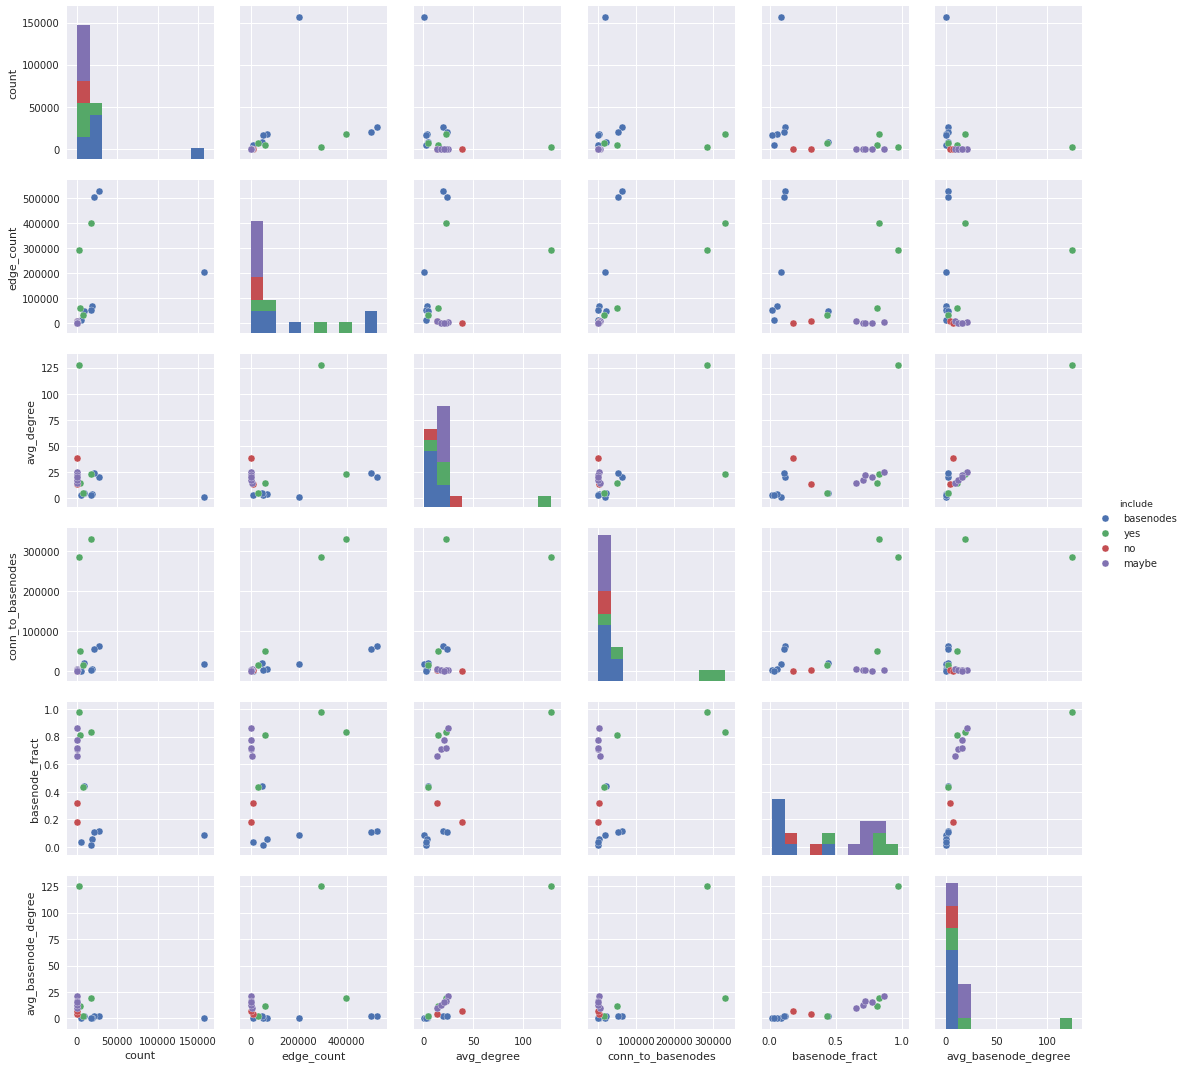

In [34]:
dat_final = dat1.loc[n1_final].sort_values('count', ascending=False)
sns.pairplot(dat_final[plot_list + ['include']], hue='include')

In [38]:
with open('data/n1_types.txt', 'w') as fout:
    for line in n1_final:
        fout.write(line)